<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-I---Exploratory-Data-Analysis¶" data-toc-modified-id="Part-I---Exploratory-Data-Analysis¶-1">Part I - Exploratory Data Analysis¶</a></span><ul class="toc-item"><li><span><a href="#1.1-Packages-to-be-Imported" data-toc-modified-id="1.1-Packages-to-be-Imported-1.1">1.1 Packages to be Imported</a></span></li></ul></li><li><span><a href="#Part-II---Experiment-and-Metrics-Designs" data-toc-modified-id="Part-II---Experiment-and-Metrics-Designs-2">Part II - Experiment and Metrics Designs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-What-would-you-choose-as-the-key-measure-of-success-of-this-experiment-in-encouraging-driver-partners-to-serve-both-cities,-and-why-would-you-choose-this-metric?" data-toc-modified-id="1.-What-would-you-choose-as-the-key-measure-of-success-of-this-experiment-in-encouraging-driver-partners-to-serve-both-cities,-and-why-would-you-choose-this-metric?-2.0.1">1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</a></span></li><li><span><a href="#2.-Describe-a-practical-experiment-you-would-design-to-compare-the-effectiveness-of-the-proposed-change-in-relation-to-the-key-measure-of-success.-Please-provide-details-on:" data-toc-modified-id="2.-Describe-a-practical-experiment-you-would-design-to-compare-the-effectiveness-of-the-proposed-change-in-relation-to-the-key-measure-of-success.-Please-provide-details-on:-2.0.2">2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:</a></span><ul class="toc-item"><li><span><a href="#a.-how-you-will-implement-the-experiment" data-toc-modified-id="a.-how-you-will-implement-the-experiment-2.0.2.1">a. how you will implement the experiment</a></span></li><li><span><a href="#b.-what-statistical-test(s)-you-will-conduct-to-verify-the-significance-of-the-observation" data-toc-modified-id="b.-what-statistical-test(s)-you-will-conduct-to-verify-the-significance-of-the-observation-2.0.2.2">b. what statistical test(s) you will conduct to verify the significance of the observation</a></span></li><li><span><a href="#c.-how-you-would-interpret-the-results-and-provide-recommendations-to-the-city-operations-team-along-with-any-caveats." data-toc-modified-id="c.-how-you-would-interpret-the-results-and-provide-recommendations-to-the-city-operations-team-along-with-any-caveats.-2.0.2.3">c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Part-III---Predictive-Modeling" data-toc-modified-id="Part-III---Predictive-Modeling-3">Part III - Predictive Modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-and-Inspect-data" data-toc-modified-id="Load-and-Inspect-data-3.0.0.1">Load and Inspect data</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3.0.0.2">Data Wrangling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#avg_rating_of_driver" data-toc-modified-id="avg_rating_of_driver-3.0.0.2.0.1">avg_rating_of_driver</a></span></li><li><span><a href="#avg_rating_by_driver" data-toc-modified-id="avg_rating_by_driver-3.0.0.2.0.2">avg_rating_by_driver</a></span></li><li><span><a href="#Phone" data-toc-modified-id="Phone-3.0.0.2.0.3">Phone</a></span></li><li><span><a href="#last_trip_date" data-toc-modified-id="last_trip_date-3.0.0.2.0.4">last_trip_date</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3.0.0.3">EDA</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-3.0.1">Model Building</a></span></li><li><span><a href="#Business-Recommendations" data-toc-modified-id="Business-Recommendations-3.0.2">Business Recommendations</a></span></li></ul></li></ul></li></ul></div>


**About the Ultimate Challenge:**

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious company to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location.

# Part I - Exploratory Data Analysis¶
Aggregate the login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## 1.1 Packages to be Imported

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import calendar

In [2]:
# Load the json dataset to a dataframe
logins = pd.read_json('data/logins.json')

# Display tha head of dataframe
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Check shape of data 
logins.shape

(93142, 1)

In [4]:
# Print the info of data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


>As the output above clearly shows, the dataset has no missing values and the login_time feature has the datetime data type.

In [5]:
# Check for the simple statistics
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


>Whereas the logins dataset has a total of 93,142 entries, some of the data were duplicated (the unique number of entries is equal to 92,265). So far, with the information available to us, it is difficult to say is if those duplicated entries are valid or not. But for the purpose of this data science challenge, all entries will be accepted as valid entries.

In [6]:
# Set the 'login_time' feature as the index
logins=logins.set_index('login_time')

# Add a new column called 'count' to aggregate the login counts
logins['count']=1

# Aggregate the login counts based on 15-minute time intervals
logins=logins.resample('15T').sum()

In [7]:
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


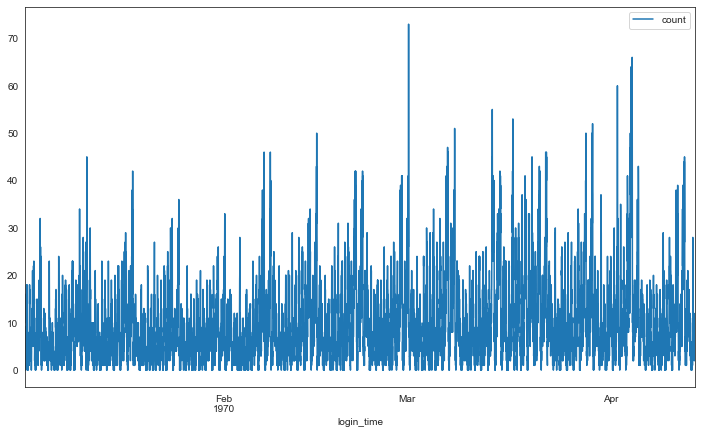

In [8]:
logins.plot(kind='line',figsize=(12,7))
plt.show()

>The line plot shows that the login counts seem to be roughly periodic and the average value seem to increase over time. In the following section, we will generate more plots to develop better insight into the periodicity of the data.



In [9]:
# List the name of days and months to be used in the subsquent plotting
days   = list (calendar.day_abbr)
months = list (calendar.month_abbr)

In [10]:
# Add a new column and convert it to a datetime object
logins['timestamp'] = pd.to_datetime(logins.index)

In [11]:
# extract time features from the datetime index

logins['month'] = logins['timestamp'].apply(lambda x : months[x.month])
logins['day'] = logins['timestamp'].apply(lambda x: days[x.weekday()])
logins['hour'] = logins['timestamp'].apply(lambda x: x.hour)

In [12]:
logins.sample(5)

,count,timestamp,month,day,hour
login_time,,,,,
1970-02-22 05:30:00,18,1970-02-22 05:30:00,Feb,Sun,5
1970-01-22 13:30:00,9,1970-01-22 13:30:00,Jan,Thu,13
1970-03-11 13:00:00,9,1970-03-11 13:00:00,Mar,Wed,13
1970-04-08 18:00:00,1,1970-04-08 18:00:00,Apr,Wed,18
1970-02-13 15:00:00,4,1970-02-13 15:00:00,Feb,Fri,15


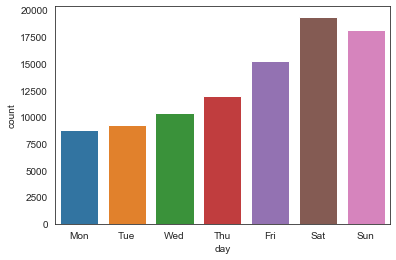

In [13]:
# Group the 'count' feature by the 'day' feature and plot it
day_counts = logins.groupby('day')['count'].sum()

sns.barplot(x=day_counts.index,y=day_counts,order=days)
plt.show()

>The graph above shows that most of the logins are happening on **Satudays** and followed by **Sundays**, whereas the least activity is happening on **Mondays**. Overall, the number of logins tend to increase over time during a week from Monday to Saturday.

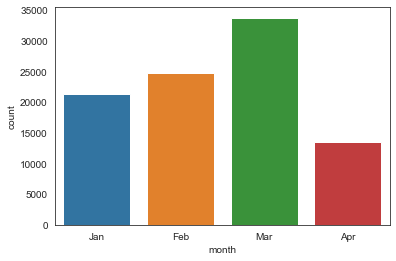

In [14]:
# Group the 'count' feature by the 'month' feature and plot it

month_counts =  logins.groupby('month')['count'].sum()

sns.barplot(x=month_counts.index,y=month_counts,order=['Jan', 'Feb', 'Mar', 'Apr'])

Again, as the monthly login data confirms, the number of logins seem to increase over the months. It should also be noted here that the data for April were limited to 13 days. Considering the increase over time, we can expect another increase in April as well.

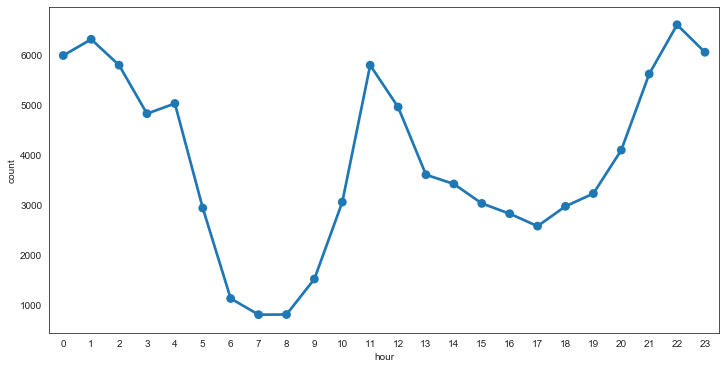

In [15]:
# group the 'count' feature by the 'hour' feature and plot it
hour_counts = logins.groupby('hour')['count'].sum()
plt.figure(figsize=(12,6))
sns.pointplot(x=hour_counts.index, y=hour_counts)
plt.show()

This graph here was produced to display the number of logins in every hour of a day. The daily pattern suggests that the login counts at 15-min intervals sees the lowest in the morning around 6:00 a.m. - 9:00 a.m. and rises up around noon 11:00 a.m. - 12:00 p.m. (possible launch time). It gradually declines until 5:00 p.m. and rises back again in the late evening 10:00 p.m. - 2:00 a.m.

# Part II - Experiment and Metrics Designs

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.



### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?



The key measure of success of this experiment can be a metric that indicates the percentage of time drivers, irrespective of which city they belong to, spend in either city. Since the two neighboring cities have a complementary circadian rhythms, we would expect that the average amount of time a driver spend in either city should be ideally close to equal in a perfectly succesful experiment: 50% of the time in Gotham and 50% of the time in Metropolis. If the driver spend more time in either of the cities, it means that the experiment is less successful or not sucessful at all depending upon the expectations from this experiment. Basically, I propose the ratio of time spend in the cities of Gotham and Metropolis as the success metric where the ratio of 1:1 means that the experiment is successful.

###  2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

#### a. how you will implement the experiment

I would implement the following steps as part of this experiment to see if the proposed changes on toll costs have affected the behavior of the drivers:

First, I would need to find out the data for driver partners of the cities of Gotham and Metropolis.
For each group of drivers, I would randomly split the group in half (the control and experiment group).
As the drivers in experiment group pass the toll-bridge, I would provide them the reimburserment of all toll costs.
Lastly, I would compare the the control and experiment groups who were paid for toll costs to see if there is a statistically significant difference on the behaviors of drivers between the groups.


#### b. what statistical test(s) you will conduct to verify the significance of the observation

I would conduct an A/B test to verify the significance of the observation after I randomly divide each group of drivers into half. The A/B test would allow us to compare the control and experiment groups where the toll reimbursement works as the variable between the groups. After I collect enough data, I would perform a hypothesis testing and compute a two-sample t statistic to determine the significance of the observation. If the null hypothesis holds, it implies that the experiment has been a failure. Otherwise, it implies the toll reimbursement experiment is a success.

#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

Again, based on the p-value obtained from the above t-test for each group, if we reject the null hypothesis, I would recommend the Ultimate managers of city operation to continue implementing the toll reimbursement to encourage drivers to be available in both cities. if we fail to reject the null hypothesis, I would suggest that they should stop implementing the experiment and develop other solutions.



# Part III - Predictive Modeling
***
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

__The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.__

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Load and Inspect data

In [16]:
# import packages
import json

# Read json data into dataframe

with open ('data/ultimate_data_challenge.json') as ud :
    ultimate = json.load(ud)
    
# Convert to dataframe
ultimate = pd.DataFrame(ultimate)


# Print head of ultimate data

print(ultimate.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

In [17]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in 'avg_rating_of_driver','phone ',and 'avg_rating_by_driver ' columns. they need to be managing.

In [18]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Here, the descriptive stistics of the all features are displayed. The maximum values in some columns seem to be much larger than the mean, but based on other informations and plots, no apparent outliers are identified.

#### Data Wrangling

 I will impute the three columns given above with the missing values. To do so, I need some information for each column such as mean or median to be used for imputation.

###### avg_rating_of_driver

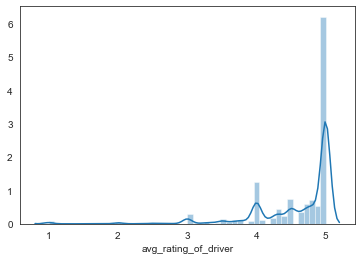

In [19]:
sns.distplot(ultimate[ultimate['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'])
plt.show()

In [20]:
# Fill the missing values with themean of 'avg_rating_of_driver'
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(ultimate['avg_rating_of_driver'].mean())

###### avg_rating_by_driver

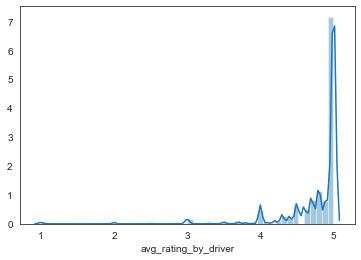

In [21]:
sns.distplot(ultimate[ultimate['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])

In [22]:
# Fill the missing values with themean of 'avg_rating_of_driver'
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(ultimate['avg_rating_by_driver'].mean())

I filled missing values with mean instead of drop, because I think it is more useful.

###### Phone

In [23]:
ultimate.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

Iphone seems to be used  more than Android. so we can impute missing values with Iphone or we could just leave as it is

In [24]:
# Fill the missing values of the 'phone' column with the value of 'Iphone'

ultimate['phone'] = ultimate['phone'].fillna('Iphone')

###### last_trip_date

In [25]:
# Convert date-related columns to datatime format
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'],format='%Y-%m-%d')
ultimate['signup_date']    = pd.to_datetime(ultimate['signup_date'],   format='%Y-%m-%d')


To be able to perform rider retention prediction, I need to operationalize 'rider retention'.

In [26]:
# Sort the last trip date to determine the user retention
ultimate['last_trip_date'].sort_values(ascending=False).head(10)

45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
14419   2014-07-01
38661   2014-07-01
45143   2014-07-01
45154   2014-07-01
45155   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

Based on the last trip date info, the data was pulled on July 1, 2014. So, a rider is considered retained if s/he took a trip after June 1, 2014.

In [27]:
# Compute the cutoff time for determing user retention
cutoff = ultimate['last_trip_date'].max() - pd.Timedelta('30 days')

cutoff

Timestamp('2014-06-01 00:00:00')

In [28]:
# Determine if a user is retained based on the cutoff time
ultimate['retained'] = ultimate['last_trip_date'].apply(lambda x: 1 if x >= cutoff else 0)

# Compute the fraction of user retained
ultimate['retained'].value_counts()

0    31196
1    18804
Name: retained, dtype: int64

As shown, only 18,804 riders (37.6% of all users) signed up in January, 2014 are retained six month later.

In [29]:
ultimate = ultimate.drop('signup_date', axis=1)

In [30]:
ultimate = ultimate.drop('last_trip_date', axis=1)

#### EDA

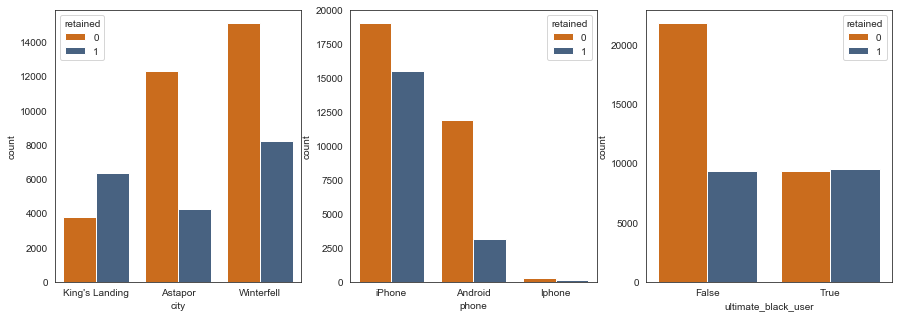

In [31]:
plt.figure(figsize=(15,5))

# city and retained
ax1 = plt.subplot(1,3,1)
sns.countplot(x='city', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

# phone and retained
ax2 = plt.subplot(1,3,2)
sns.countplot(x='phone', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

# ultimate_black_user and retained
ax3 = plt.subplot(1,3,3)
sns.countplot(x='ultimate_black_user', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

plt.show()

When we look at the relationship between the categorical features and the retained feature (dependent/target variable), King's Landing seems to be the most successful among the three cities, whereas Astapor is the least successful. Also, iPhone users have higher retention rate than Android users. Lastly, ultimate black users have a higher retention rate than non-ultimate black users.



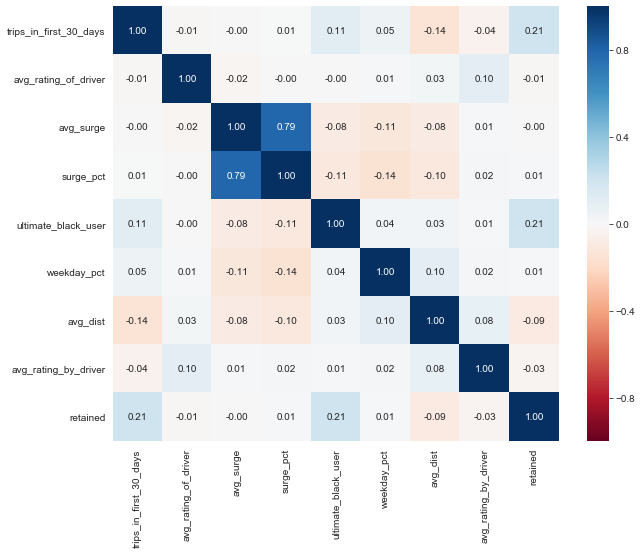

In [32]:
# generate a heatmap for the numerical features and the target feature
plt.figure(figsize=(10,8))
sns.heatmap(ultimate.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='RdBu')
plt.show()

According to the heatmap above, among the numerical features, trips_in_first_30_days and ultimate_black_user features have the highest positive correlation with the retantion variable. avg_dist, on the hand hand, has the highest negative correlation with the retantion variable.

### Model Building
Im this section, 4 different classification algorithms will be used to predict rider retention.

1. Logistic Regression (Linear)
2. Support Vector Machine Classifier (SVM) (Non-linear)
3. Random Forest Classifier (ensemble of tree-based)
4. Gradient Boosting Classifier ((ensemble of tree-based)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [34]:
# convert categorical features into dummy variables
ultimate = pd.get_dummies(ultimate, drop_first=True)

In [35]:
# check again for basic info of the dataframe
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
retained                  50000 non-null int64
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Iphone              50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(1), float64(6), int64(2), uint8(4)
memory usage: 3.3 MB


In [36]:
# extract the features X  and the target variable y
y = ultimate['retained']
X = ultimate.drop('retained', axis=1)

In [37]:
# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

In [38]:
# scale X_train numeric continuous features
scaler = StandardScaler()
numeric_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].to_list()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [39]:
# I will list and compare the different algorithms. 
model_evaluation = []

def Evaluation(model, X_test, y_test, y_pred):
    """
    This function is to produce model statistics
    """
    # Append model statistics to model_evaluation list
    roc_auc = roc_auc_score(y_test, y_pred)
    Precision=precision_score(y_test,y_pred)
    Accuracy=accuracy_score(y_test,y_pred)
    Recall=recall_score(y_test,y_pred)
    F1=f1_score(y_test,y_pred)
    model_evaluation.append([model, Accuracy, roc_auc, Precision, Recall, F1])

In [40]:
# Create a dictionary for the models
models = {'LR': LogisticRegression(),
          'SVM': SVC(),
          'RF': RandomForestClassifier(),
          'GB': GradientBoostingClassifier()}

# flag variable
header = True

for i in models.keys():
    models[i].fit(X_train, y_train)
    scores = models[i].score(X_test, y_test)
    if header == True:
        print('model', '\t', 'accuracy_score')
        print('-----------------------')
        header = False
    
    print(i, '\t', scores)
    
    # Predict the labels
    y_pred = models[i].predict(X_test)
    Evaluation(i, X_test, y_test, y_pred)

model 	 accuracy_score
-----------------------
LR 	 0.67048
SVM 	 0.62392
RF 	 0.62912
GB 	 0.63488


In [41]:
# prepare a dataframe using all the models with their performance measures
df_eval=pd.DataFrame(model_evaluation,columns=['Model', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall', 'F1'])
df_eval.sort_values(['ROC_AUC'],ascending=False,inplace=True)
df_eval=df_eval.set_index('Model')
df_eval

,Accuracy,ROC_AUC,Precision,Recall,F1
Model,,,,,
LR,0.67048,0.633472,0.573300,0.484152,0.524968
RF,0.62912,0.561711,0.512223,0.289726,0.370109
GB,0.63488,0.545245,0.543109,0.183578,0.274404
SVM,0.62392,0.500000,0.000000,0.000000,0.000000


__GradientBoostingClassifier__ algorithm has the highest accuracy score along with the highest ROC-AUC, precision, recall, and F1 scores. Overall, it gives the highest performance in predicting the rider retention. In the following section, I will perform a parameter-tuning for the GradientBoostingClassifier model.

In [42]:
# grid search optimization of GradientBoostingClassifier

# grid search of parameters n_estimators and max_features to improve GradientBoostingClassifer model
param_grid = {'n_estimators': np.arange(200,1000,200)}

# instantiate a Decision Tree classifier: tree
gb = GradientBoostingClassifier()

# instantiate the GridSearchCV object
gb_cv = GridSearchCV(gb, param_grid, scoring='accuracy', cv=3)

# fit it to the data
gb_cv.fit(X_train, y_train)

# print the tuned parameters and score
print("Tuned Gradient Boosting Classifier Parameters: {}".format(gb_cv.best_params_)) 
print("Best score is {}".format(gb_cv.best_score_))

Tuned Gradient Boosting Classifier Parameters: {'n_estimators': 600}
Best score is 0.7877066666666667


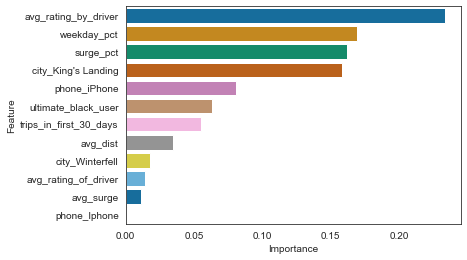

In [43]:
gb = GradientBoostingClassifier(n_estimators=600)
gb.fit(X_train, y_train)

# feature importance
feat = X_train.columns
imp = gb.feature_importances_
df_gb = pd.DataFrame({'Feature': feat, 'Importance': imp})
df_gb = df_gb.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_gb, palette='colorblind');

### Business Recommendations
1. The drivers of King's Landing tend to have greater probability for retention compared to the other two cities. One recommendation can be increasing operations in King's Landing or alternatively looking for the possible reasons for the rider retention that is unique to the King's Landing.
2. Ultimate black users also tend to show a greater retention rate than the non-ultimate black users. Similarly, drivers who use iPhone have a higher probability to remain than the drivers who use Android phones. Additional investigation may be required to understand the reasons behind the differences between the groups.
3. As the Gradient Boosting Classifier suggests, avg_rating_by_driver, surge_pct and weekday_pct features are among the most important features in predicting rider retention. Hence, the Ultimate Inc. can focus on these important features as giving perks or additional benefits to those who drive in weekdays.